## Part 0: Data Collection from Google Big Query

### Add authentication credentials to access Big Query API

In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/psparks/Documents/Springboard/GDELT Testing-31a7081b0cbc.json"

### The BigQuery Python client library provides a magic command that allows you to run queries with minimal code. To load the magic commands from the client library, paste the following code into the first cell of the notebook.

In [2]:
# %load_ext google.cloud.bigquery

### The BigQuery client library provides a cell magic,  _%%bigquery_, which runs a SQL query of all French BigQuery events since Feb. 1 2016 and returns the results as a Pandas DataFrame.

In [3]:
# %%bigquery france_subset
# SELECT *
# FROM `gdelt-bq.full.events`
# WHERE ActionGeo_CountryCode = 'FR' AND MonthYear >= 201601

In [4]:
# france_subset.shape

### After downloading data, save it for future use

In [5]:
# france_subset.to_csv('france_subset_1619_2.csv.bz2', header = True, compression='bz2')

### Now read it back for future data wrangling

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [7]:
import warnings; warnings.simplefilter('ignore')

In [8]:
%time
france_subset = pd.read_csv('france_subset_1619_2.csv.bz2', compression='bz2')

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11 µs


In [9]:
france_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103885 entries, 0 to 3103884
Data columns (total 59 columns):
Unnamed: 0               int64
GLOBALEVENTID            int64
SQLDATE                  int64
MonthYear                int64
Year                     int64
FractionDate             float64
Actor1Code               object
Actor1Name               object
Actor1CountryCode        object
Actor1KnownGroupCode     object
Actor1EthnicCode         object
Actor1Religion1Code      object
Actor1Religion2Code      object
Actor1Type1Code          object
Actor1Type2Code          object
Actor1Type3Code          object
Actor2Code               object
Actor2Name               object
Actor2CountryCode        object
Actor2KnownGroupCode     object
Actor2EthnicCode         object
Actor2Religion1Code      object
Actor2Religion2Code      object
Actor2Type1Code          object
Actor2Type2Code          object
Actor2Type3Code          object
IsRootEvent              int64
EventCode                int

## Part 1: Data Cleaning

### Let review what data we have.

In [10]:
france_subset.head()

,Unnamed: 0,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,0,523961397,20160324,201603,2016,2016.230100,NaN,NaN,NaN,NaN,...,FR,1,France,FR,FR,46.0000,2.00000,FR,20160324,http://www.goldcoastbulletin.com.au/news/natio...
1,1,521622559,20160316,201603,2016,2016.208200,NaN,NaN,NaN,NaN,...,FR,1,France,FR,FR,46.0000,2.00000,FR,20160316,http://www.newsmax.com/TheWire/italy-unsold-fo...
2,2,516418595,20160229,201602,2016,2016.161621,NaN,NaN,NaN,NaN,...,FR,1,France,FR,FR,46.0000,2.00000,FR,20160229,http://www.irishtimes.com/life-and-style/peopl...
3,3,522928257,20160321,201603,2016,2016.221900,NaN,NaN,NaN,NaN,...,FR,1,France,FR,FR,46.0000,2.00000,FR,20160321,http://www.ibtimes.co.uk/malaysia-palm-oil-cou...
4,4,538837301,20160510,201605,2016,2016.356200,NaN,NaN,NaN,NaN,...,-1409795,4,"French Riviera, France (general), France",FR,FR00,43.5599,7.13672,-1409795,20160510,http://movies.ndtv.com/bollywood/en-route-cann...


### We are going to subset the data based on the most relevant columns, according to source: https://jameshoward.us/wp-content/uploads/2018/03/Parrish-Crystal-Cube.pdf

In [11]:
france_events = france_subset[['SQLDATE', 'Actor1Name', 'Actor2Name', 'SOURCEURL', 'MonthYear', 'EventRootCode', 'GoldsteinScale', 'NumMentions', 'AvgTone', 'ActionGeo_CountryCode', 'ActionGeo_Lat', 'ActionGeo_Long']]

In [12]:
france_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103885 entries, 0 to 3103884
Data columns (total 12 columns):
SQLDATE                  int64
Actor1Name               object
Actor2Name               object
SOURCEURL                object
MonthYear                int64
EventRootCode            int64
GoldsteinScale           float64
NumMentions              int64
AvgTone                  float64
ActionGeo_CountryCode    object
ActionGeo_Lat            float64
ActionGeo_Long           float64
dtypes: float64(4), int64(4), object(4)
memory usage: 284.2+ MB


### Convert SQLDATE to datetime format

In [13]:
france_events.SQLDATE = pd.to_datetime(france_subset.SQLDATE, format = '%Y%m%d')

In [14]:
france_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103885 entries, 0 to 3103884
Data columns (total 12 columns):
SQLDATE                  datetime64[ns]
Actor1Name               object
Actor2Name               object
SOURCEURL                object
MonthYear                int64
EventRootCode            int64
GoldsteinScale           float64
NumMentions              int64
AvgTone                  float64
ActionGeo_CountryCode    object
ActionGeo_Lat            float64
ActionGeo_Long           float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 284.2+ MB


In [15]:
france_events.sort_values(by=['SOURCEURL'], ascending=True).iloc[:5]

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
334888,2016-02-23,MINIST,PARIS,"5 Kanal TV, Kiev/BBC Monitoring/(c) BBC",201602,4,1.0,1,-0.302115,FR,49.0000,0.00000
1571981,2016-02-23,UKRAINE,GOVERNMENT OFFICIAL,"5 Kanal TV, Kiev/BBC Monitoring/(c) BBC",201602,4,7.0,1,3.021148,FR,49.0000,0.00000
1573287,2016-02-23,NaN,PARIS,"5 Kanal TV, Kiev/BBC Monitoring/(c) BBC",201602,4,1.0,8,3.021148,FR,48.8667,2.33333
491420,2017-03-09,DIPLOMAT,FRANCE,"5 Kanal TV, Kiev/BBC Monitoring/(c) BBC",201703,4,1.0,6,2.272727,FR,49.0000,0.00000
2045042,2017-03-09,UKRAINIAN,FRANCE,"5 Kanal TV, Kiev/BBC Monitoring/(c) BBC",201703,4,1.0,1,2.272727,FR,48.8667,2.33333


In [16]:
france_events.sample(10)

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
606713,2018-09-23,PARIS,TOURIST,https://www.dawn.com/news/1434403/15-tourists-...,201809,18,-9.5,10,-8.547009,FR,48.8667,2.33333
2395181,2018-07-14,BRITAIN,NaN,http://www.wsws.org/en/articles/2018/07/14/tru...,201807,14,-6.5,3,-2.670455,FR,46.0000,2.00000
1676945,2017-05-26,NaN,FRANCE,http://www.buro247.com.au/culture-lifestyle/tr...,201705,4,1.9,2,5.970149,FR,48.8755,-1.18095
1111747,2017-03-09,FRANCE,ARMENIA,http://asbarez.com/161054/sarkisian-hollande-d...,201703,4,2.8,2,1.735648,FR,48.8667,2.33333
1644222,2016-12-29,GOVERNMENT,MILITARY,http://howafrica.com/nigeria-french-man-who-al...,201612,17,-5.0,8,-1.015228,FR,46.0000,2.00000
1063656,2016-08-30,FRANCE,NaN,https://www.commentarymagazine.com/culture-civ...,201608,19,-10.0,3,-0.641026,FR,46.0000,2.00000
32640,2018-06-07,PRIME MINISTER,FRANCE,https://www.hilltimes.com/2018/06/06/politics-...,201806,4,2.8,1,-1.372213,FR,46.0000,2.00000
2697980,2017-09-09,FLORIDA,POPULATION,http://www.channelnewsasia.com/news/world/mass...,201709,17,-5.0,3,-8.638392,FR,46.0000,2.00000
2282231,2016-10-24,VOTER,PARLIAMENT,http://www.cpac.ca/en/programs/voting-reform/e...,201610,4,1.0,10,3.636364,FR,46.0000,2.00000
2234220,2017-07-14,UNITED STATES,PARIS,http://www.irvinetimes.com/news/15410976.Donal...,201707,4,1.9,2,-0.888889,FR,48.8667,2.33333


### Notice how we can't see the full URLs yet? Let's try to change that.

In [17]:
pd.set_option('display.max_colwidth', -1)

In [18]:
france_events.sample(5, random_state=1)

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
2130769,2018-09-01,PRESIDENT,PARIS,https://www.goskagit.com/news/world/how-macron-won-trump-s-friendship-failed-to-influence-him/article_40161889-95f8-58f9-996e-f156d774a9d8.html,201809,4,1.9,16,2.119462,FR,48.8667,2.33333
1242414,2016-02-05,PARIS,TERRORIST,http://www.arabnews.com/news/875471,201602,20,-10.0,20,-3.047394,FR,48.8667,2.33333
2550644,2018-05-29,CANADA,COMMUNITY,http://www.yorktonnews.com/france-s-macron-to-meet-trudeau-visit-montreal-ahead-of-g7-summit-in-quebec-1.23317715,201805,1,0.0,2,0.847458,FR,48.8667,2.33333
2984274,2019-03-05,FRENCH,NaN,https://www.msn.com/en-sg/lifestyle/style/teeny-tiny-handbag-becomes-a-fashion-sensation/ar-BBUnjMk,201903,11,-2.0,318,1.216732,FR,48.8667,2.33333
1304530,2018-05-06,BRITAIN,UNITED KINGDOM,https://www.bignewsnetwork.com/news/257198553/trump-stirs-another-controversy-over-gun-laws-uk-fumes,201805,3,4.0,1,-5.350118,FR,48.8667,2.33333


In [19]:
france_events.sample(5, random_state=2)

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
1994159,2017-03-29,PARIS,PREMIER,https://www.360nobs.com/2017/03/zlatan-ibrahimovic-hints/,201703,4,2.8,6,1.694915,FR,48.8667,2.33333
2838338,2018-02-16,BUSINESS,NaN,http://www.prweb.com/releases/2018/02/prweb15214603.htm,201802,1,0.0,6,5.280528,FR,47.1672,0.24564
2577313,2017-06-29,NAVAL,NaN,http://carnegieindia.org/publications/?fa=71395,201706,2,3.0,5,3.324808,FR,48.8667,2.33333
272698,2017-11-29,PARIS,NEW YORK,http://www.aljazeera.com/indepth/opinion/slavery-walls-fortress-europe-171128094218944.html,201711,14,-6.5,6,-6.577480,FR,48.8667,2.33333
1743688,2019-06-10,JEWISH,FRENCH,https://harpers.org/blog/2019/06/my-french-side/,201906,5,3.5,2,-0.941423,FR,46.7333,2.70000


#### After grabbing the full URLs, we're able to see that the subjects in the stories match the actors listed in Actor1Name and Actor2Name.

### Those URLs could be cleaned up a bit more in order to group the news by domain name later.

In [20]:
domains = france_events['SOURCEURL'].str.extract('(?<=http://)(.*?)(?=/)|(?<=https://)(.*?)(?=/)')
domains = domains[0].fillna(domains[1]).fillna(france_events['SOURCEURL'])

In [21]:
domains[:20]

0     www.goldcoastbulletin.com.au
1     www.newsmax.com             
2     www.irishtimes.com          
3     www.ibtimes.co.uk           
4     movies.ndtv.com             
5     lompocrecord.com            
6     www.bbc.co.uk               
7     www.brisbanetimes.com.au    
8     www.bloomberg.com           
9     www.paxtonrecord.net        
10    www.bloomberg.com           
11    whoswholegal.com            
12    www.monitor.co.ug           
13    onmilwaukee.com             
14    www.sharenet.co.za          
15    www.thesudburystar.com      
16    listverse.com               
17    mobile.wnd.com              
18    ecommerce-journal.com       
19    www.enca.com                
Name: 0, dtype: object

In [22]:
france_events['DOMAINNAME'] = domains

In [23]:
france_events.head()

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,DOMAINNAME
0,2016-03-24,NaN,POLICE,http://www.goldcoastbulletin.com.au/news/national/qantas-pilot-believed-to-have-deliberately-crashed-plane-into-sea-off-byron-bay/news-story/2f1b1154e10c139a36312c088424f381?nk=ad15cd490373050ab7a2275d46ead101-1458786743,201603,1,0.0,84,-2.747776,FR,46.0000,2.00000,www.goldcoastbulletin.com.au
1,2016-03-16,NaN,LAWMAKER,http://www.newsmax.com/TheWire/italy-unsold-food-law/2016/03/16/id/719333/,201603,1,0.0,2,-0.643087,FR,46.0000,2.00000,www.newsmax.com
2,2016-02-29,NaN,IRELAND,http://www.irishtimes.com/life-and-style/people/life-and-death-the-rotunda-and-the-rising-1.2549489,201602,4,1.9,8,0.675454,FR,46.0000,2.00000,www.irishtimes.com
3,2016-03-21,NaN,FARMER,http://www.ibtimes.co.uk/malaysia-palm-oil-council-slams-frances-tax-palm-oil-vows-retaliation-1550662,201603,12,-4.0,10,-5.533493,FR,46.0000,2.00000,www.ibtimes.co.uk
4,2016-05-10,NaN,FRANCE,http://movies.ndtv.com/bollywood/en-route-cannes-mallika-sherawat-tweets-pic-of-the-eiffel-tower-1404752,201605,4,1.9,2,0.000000,FR,43.5599,7.13672,movies.ndtv.com


In [24]:
france_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103885 entries, 0 to 3103884
Data columns (total 13 columns):
SQLDATE                  datetime64[ns]
Actor1Name               object
Actor2Name               object
SOURCEURL                object
MonthYear                int64
EventRootCode            int64
GoldsteinScale           float64
NumMentions              int64
AvgTone                  float64
ActionGeo_CountryCode    object
ActionGeo_Lat            float64
ActionGeo_Long           float64
DOMAINNAME               object
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 307.8+ MB


### Of our remaining columns, which ones have missing values?

In [25]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [26]:
missing_zero_values_table(france_events)

Your selected dataframe has 13 columns and 3103885 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Actor2Name,0,645666,20.8,645666,20.8,object
Actor1Name,0,212579,6.8,212579,6.8,object
GoldsteinScale,293127,52,0.0,293179,9.4,float64


 ### Adding the actor names may take a lot of web scraping and NLP processing that may be of dubious value at the moment, but having missing `GoldsteinScale` values would definitely skew our predictions later.

In [27]:
france_events[france_events['GoldsteinScale'].isnull()]

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,DOMAINNAME
10853,2016-03-17,DISSIDENT,RUSSIA,http://www.newstimes.com/news/world/article/Kazakh-banker-s-wife-urges-France-not-to-send-him-6893210.php,201603,12,NaN,1,-8.888889,FR,48.8667,2.33333,www.newstimes.com
61541,2019-03-19,FRANCE,RUSSIA,https://www.bbc.co.uk/news/world-asia-pacific-15483497,201903,12,NaN,8,-5.444646,FR,46.0000,2.00000,www.bbc.co.uk
69189,2016-03-22,NaN,FRANCE,http://www.ndtv.com/world-news/francois-hollande-meets-paris-attack-victims-after-suspect-captured-1289524,201603,12,NaN,30,-4.288813,FR,48.8667,2.33333,www.ndtv.com
76295,2016-03-16,FRANCE,RUSSIA,https://www.equities.com/news/kazakh-banker-s-wife-urges-france-not-to-send-him-to-russia,201603,12,NaN,42,-10.456544,FR,48.8667,2.33333,www.equities.com
192692,2016-03-21,LAWYER,FRANCE,http://www.ndtv.com/world-news/francois-hollande-to-meet-paris-attack-victims-after-suspect-captured-1289335,201603,12,NaN,16,-4.973868,FR,48.8667,2.33333,www.ndtv.com
264112,2016-03-09,FRANCE,THE NETHERLAND,http://www.msn.com/en-gb/news/uknews/dentist-of-horror-on-trial-for-mutilating-french-patients/ar-AAgxAJj,201603,12,NaN,2,-7.117438,FR,47.8632,1.80278,www.msn.com
266258,2016-03-21,NaN,FRANCE,http://senegal-actu.com/2016/03/captured-paris-suspect-was-preparing-terrorist-attacks-in/,201603,12,NaN,85,-4.769915,FR,48.8667,2.33333,senegal-actu.com
271626,2016-03-20,NaN,FRANCE,http://www.theguardian.com/world/2016/mar/20/salah-abdeslam-lawyer-plans-sue-revelations-aborted-suicide-plan,201603,12,NaN,8,-7.415730,FR,48.8667,2.33333,www.theguardian.com
327096,2016-12-10,FRANCE,RUSSIA,http://www.onenewspage.com/n/Front+Page/759ytzu7n/Kazakh-oligarch-Mukhtar-Ablyazov-walks-free-after-France.htm,201612,12,NaN,2,-7.692308,FR,46.0000,2.00000,www.onenewspage.com
335268,2016-03-16,FRANCE,RUSSIA,http://newsok.com/france-kazakh-banker/article/feed/983565,201603,12,NaN,4,-10.259918,FR,48.8667,2.33333,newsok.com


### After reviewing the stories from the URL, they mostly seem to deal with a fairly negative and escalatory action taken by the French government. The Goldstein scale typically gives these stories a `-5` rating based on their WEIS charts, so that's what I will add.

In [28]:
france_events['GoldsteinScale'] = france_events['GoldsteinScale'].fillna(value= -5)

#### Example row where the `GoldsteinScale` was previously empty.

In [29]:
france_events.iloc[[1749977]]

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,DOMAINNAME
1749977,2016-03-16,FRENCH,RUSSIA,http://www.ajc.com/ap/ap/top-news/kazakh-bankers-wife-urges-france-not-to-send-him-t/nqmXb/,201603,12,-5.0,48,-11.01576,FR,48.8667,2.33333,www.ajc.com


In [30]:
missing_zero_values_table(france_events)

Your selected dataframe has 13 columns and 3103885 Rows.
There are 2 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Actor2Name,0,645666,20.8,645666,20.8,object
Actor1Name,0,212579,6.8,212579,6.8,object


### Part one summary:
 - Formatted the `SQLDATE` to a Pandas datetime object.
 - Extracted the URL from the `SOURCEURL` and gave placed it into the `DOMAINNAME` column
 - Filled in null data for empty `GoldsteinScale` values.

## Part 2: Exploration of the French Events

### What are the top event root codes?

In [31]:
top_ten_event_roots = france_events.EventRootCode.value_counts()[:10]
top_ten_event_roots

4     823954
1     424064
5     275152
3     239370
11    203144
2     202037
19    199567
17    131519
8     112596
7     84503 
Name: EventRootCode, dtype: int64

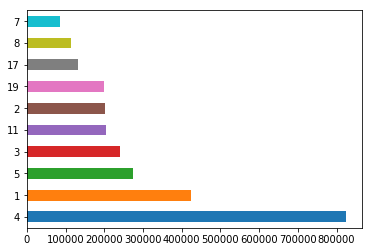

In [32]:
top_ten_event_roots.plot(kind='barh')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110de90f0>]],
      dtype=object)

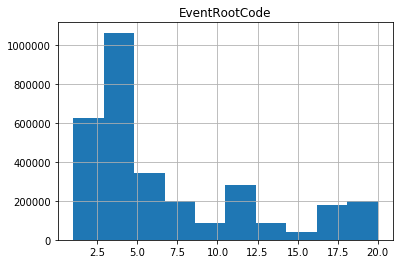

In [33]:
france_events.hist('EventRootCode')

In [34]:
print(france_events.EventRootCode.max(), france_events.EventRootCode.min())

20 1


In [35]:
france_events.EventRootCode.unique()

array([ 1,  4, 12, 19,  5,  3, 11, 16, 18,  8,  2, 13, 17,  9,  7,  6, 14,
       10, 15, 20])

### May want to use EventCode or EventBaseCode for more specificity.

### Top GoldsteinScale values?

In [36]:
top_ten_GoldsteinScale = france_events.GoldsteinScale.value_counts()[:10]
top_ten_GoldsteinScale

 0.0     293127
 1.9     264002
-2.0     263387
 2.8     241090
 4.0     214349
-10.0    195690
 1.0     193941
 7.0     191946
 3.4     189636
-5.0     168432
 3.0     165080
-4.0     81490 
 8.0     60633 
 0.4     60057 
 5.0     56801 
 7.4     53156 
-0.4     49301 
 6.0     40550 
 3.5     37072 
-9.0     35321 
-4.4     31518 
-6.5     30783 
 10.0    23560 
Name: GoldsteinScale, dtype: int64

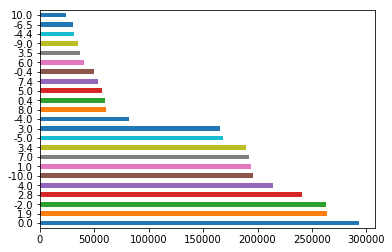

In [37]:
top_ten_GoldsteinScale.plot(kind='barh')

In [38]:
print(france_events.GoldsteinScale.max(), france_events.GoldsteinScale.min())

10.0 -10.0


In [39]:
france_events.GoldsteinScale.unique()

array([  0.        ,   1.89999998,  -4.        ,   1.9       ,
       -10.        ,   2.8       ,   1.        ,   8.        ,
         4.        ,  -2.        ,  -7.        ,  -9.        ,
        -0.4       ,   3.4       ,  -0.1       ,   7.        ,
         3.        ,  -5.        ,  -9.5       ,   5.        ,
         5.2       ,  -0.3       ,   3.5       ,   7.4       ,
         6.4000001 ,  -4.4       ,   7.4000001 ,   2.79999995,
        -6.5       ,   0.40000001,   8.3       ,  10.        ,
         6.        ,   9.        ,   0.4       ,   3.2       ,
        -8.        ,   6.4       ,   3.4000001 ,  -0.40000001,
         2.5       ,  -5.8       ,  -9.19999981,  -7.2       ,
        -9.2       ,  -0.30000001,  -7.5       ,   4.5       ,
         3.8       ,  -5.6       ,  -4.4000001 ,  -0.1       ,
         5.19999981,   8.5       ,   3.79999995,  -5.5999999 ,
        -7.19999981,   3.20000005,  -5.80000019,   8.30000019])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112d0a240>]],
      dtype=object)

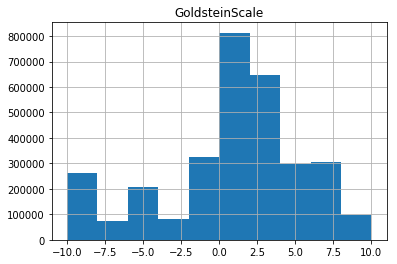

In [40]:
france_events.hist('GoldsteinScale')

### After looking at the 10 values for GoldsteinScale, still not sure what it means in context.

In [41]:
france_events.loc[france_events['GoldsteinScale'] == 10]

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,DOMAINNAME
165,2016-02-05,IRANIAN,ISLAMIC,http://www.weupit.com/peugeot-to-take-part-in-a-400-million-euro-investment-in-iran/28515/,201602,8,10.0,1,-2.301255,FR,48.8667,2.333330,www.weupit.com
796,2016-02-22,BRITAIN,NaN,https://www.minnpost.com/foreign-concept/2016/02/would-britain-actually-vote-leave-european-union,201602,8,10.0,2,-0.229709,FR,46.0000,2.000000,www.minnpost.com
977,2017-11-01,PRESIDENT,NaN,http://justsaynews.com/community-groups-call-on-ducey-to-commit-to-action-on-climate-change/,201711,8,10.0,2,1.351351,FR,48.8667,2.333330,justsaynews.com
1131,2017-10-30,PARIS,UNITED STATES,https://www.lombardiletter.com/has-donald-trump-called-global-warming-a-hoax/20337/,201710,8,10.0,4,-2.902557,FR,48.8667,2.333330,www.lombardiletter.com
1796,2016-03-20,UNITED STATES,VOTER,http://www.ad-hoc-news.de/after-campaigns-in-which-president-obama-expanded-the--/de/News/48929143,201603,8,10.0,2,-4.137931,FR,46.0000,2.000000,www.ad-hoc-news.de
2014,2016-05-01,NaN,FIJI,http://www.fijitimes.com/story.aspx?id=351956,201605,8,10.0,4,-1.096033,FR,46.0000,2.000000,www.fijitimes.com
2242,2016-04-30,NORWAY,NaN,http://www.wsbradio.com/ap/ap/business/in-norway-search-for-2-missing-bodies-after-deadly/nrFJr/,201604,8,10.0,22,-2.489300,FR,48.8667,2.333330,www.wsbradio.com
2864,2016-06-26,FRENCH,NaN,http://carolineclarkson.blogs.france24.com/article/2016/06/26/brexit-uk-france-referendum-constitution-people,201606,8,10.0,3,-3.595080,FR,46.0000,2.000000,carolineclarkson.blogs.france24.com
3350,2016-05-21,BARACK OBAMA,IRAQ,http://lucenainformacion.com/2016/05/21/egyptian-military-finds-debris-of-crashed-airliner/,201605,8,10.0,2,-1.665799,FR,48.8667,2.333330,lucenainformacion.com
3440,2016-05-12,NaN,KIGALI,http://www.newtimes.co.rw/section/article/2016-05-13/199826/,201605,8,10.0,10,2.058824,FR,46.0000,2.000000,www.newtimes.co.rw


### Top Domain Names

In [42]:
top_twenty_domains = france_events.DOMAINNAME.value_counts()[:20]
top_twenty_domains

www.dailymail.co.uk          44941
www.france24.com             34231
www.msn.com                  28876
www.yahoo.com                28161
www.express.co.uk            20024
www.theguardian.com          19471
www.thelocal.fr              18872
sputniknews.com              18147
en.rfi.fr                    17507
www.4-traders.com            17053
www.dw.com                   14618
www.nytimes.com              13987
www.reuters.com              13735
www.business-standard.com    13305
www.independent.co.uk        12935
www.telegraph.co.uk          12749
www.bloomberg.com            10393
www.politico.eu              10033
www.washingtonpost.com       9889 
www.euractiv.com             9495 
Name: DOMAINNAME, dtype: int64

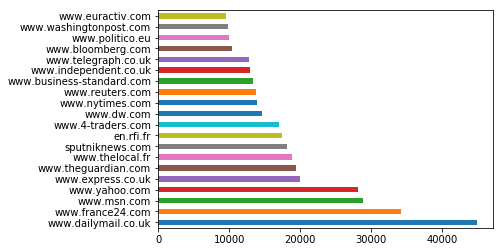

In [43]:
top_twenty_domains.plot(kind='barh')

#### Number of domain names (sources) collected from.

In [44]:
len(france_events.DOMAINNAME.value_counts())

32553

### Take a look at events per day

In [45]:
france_events.groupby("SQLDATE").size()

SQLDATE
2016-02-01    4141
2016-02-02    3399
2016-02-03    3148
2016-02-04    3073
2016-02-05    3358
2016-02-06    1799
2016-02-07    1758
2016-02-08    2773
2016-02-09    2700
2016-02-10    3119
2016-02-11    3246
2016-02-12    2893
2016-02-13    2104
2016-02-14    1785
2016-02-15    2669
2016-02-16    3456
2016-02-17    3061
2016-02-18    2814
2016-02-19    3058
2016-02-20    1804
2016-02-21    1507
2016-02-22    2404
2016-02-23    2666
2016-02-24    2773
2016-02-25    3082
2016-02-26    2482
2016-02-27    1658
2016-02-28    1520
2016-02-29    2442
2016-03-01    2985
              ... 
2019-05-23    2522
2019-05-24    2478
2019-05-25    1731
2019-05-26    2110
2019-05-27    2870
2019-05-28    2771
2019-05-29    2503
2019-05-30    2287
2019-05-31    1955
2019-06-01    1595
2019-06-02    1708
2019-06-03    2405
2019-06-04    2797
2019-06-05    4093
2019-06-06    7423
2019-06-07    3798
2019-06-08    1624
2019-06-09    1381
2019-06-10    2163
2019-06-11    2337
2019-06-12    2536
2019

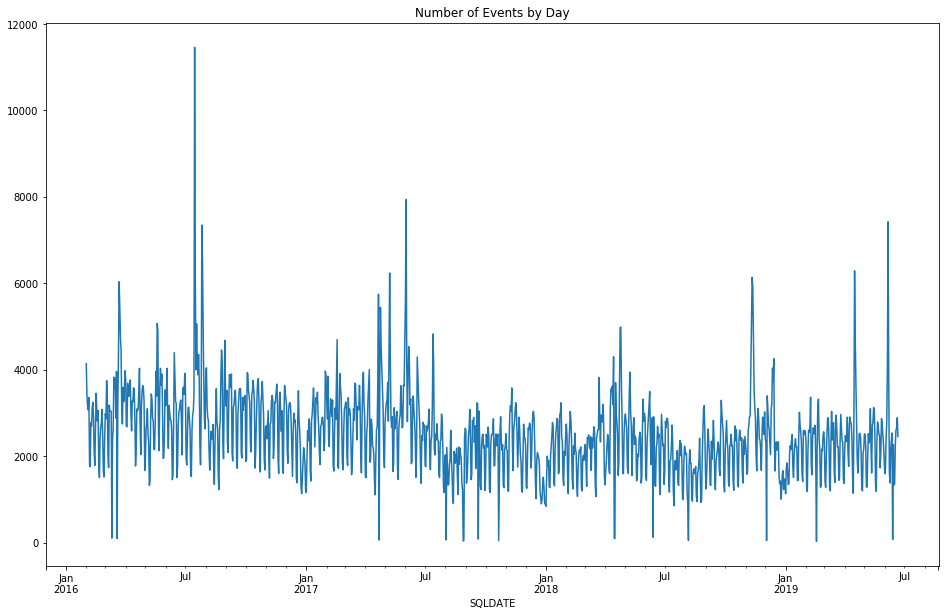

In [46]:
france_events.groupby("SQLDATE").size().plot(figsize=(16,10), title='Number of Events by Day')

### Get top days

In [47]:
france_events.groupby("SQLDATE").size().sort_values(ascending = False)[:10]

SQLDATE
2016-07-15    11460
2017-06-02    7938 
2019-06-06    7423 
2016-07-26    7347 
2016-07-27    6491 
2019-04-16    6289 
2017-05-08    6239 
2016-07-16    6197 
2018-11-11    6137 
2016-03-22    6036 
dtype: int64

### ...and bottom days.

In [48]:
france_events.groupby("SQLDATE").size().sort_values(ascending = True)[:10]

SQLDATE
2019-02-17    27
2017-08-28    38
2017-10-21    46
2018-12-03    50
2017-08-29    51
2018-08-06    51
2017-04-22    60
2017-08-02    64
2019-06-13    75
2017-09-20    83
dtype: int64

### What was occurring on these days?

In [49]:
france_events.loc[france_events['SQLDATE'] == '2016-07-15']

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,DOMAINNAME
25140,2016-07-15,ITALY,POLICE OFFICER,http://newstodaynet.com/nation/consulates-security-being-beefed-kolkata,201607,1,0.0,4,-7.590759,FR,46.0000,2.00000,newstodaynet.com
25183,2016-07-15,FRANCE,ISLAM,http://www.telegraphindia.com/1160717/jsp/foreign/story_97153.jsp,201607,1,0.0,1,-3.910615,FR,46.0000,2.00000,www.telegraphindia.com
25234,2016-07-15,IRISH,DEPARTMENT OF FOREIGN AFFAIRS,http://www.independent.ie/world-news/war-on-terror/condition-of-irishman-struck-in-nice-truck-horror-deteriorates-34888739.html,201607,1,0.0,1,-6.148591,FR,48.8667,2.33333,www.independent.ie
25463,2016-07-15,VLADIMIR PUTIN,RUSSIA,http://www.europesun.com/index.php/sid/245865869,201607,4,2.8,1,-2.406417,FR,46.0000,2.00000,www.europesun.com
29817,2016-07-15,TERRORIST,BELGIUM,https://theconservativetreehouse.com/2017/07/14/part-iii-the-defeat-of-isis-more-from-u-s-special-envoy-brett-mcgurk/comment-page-1/,201607,19,-10.0,4,-0.251142,FR,48.8667,2.33333,theconservativetreehouse.com
29824,2016-07-15,NaN,EXTREMIST,http://www.military.com/daily-news/2017/07/14/bastille-day-france-gives-big-nod-us-annual-parade.html,201607,4,1.9,85,2.004680,FR,48.8667,2.33333,www.military.com
29903,2016-07-15,TERRORIST,SYRIAN,https://theconservativetreehouse.com/2017/07/14/part-iii-the-defeat-of-isis-more-from-u-s-special-envoy-brett-mcgurk/comment-page-1/,201607,19,-10.0,6,-0.251142,FR,48.8667,2.33333,theconservativetreehouse.com
129485,2016-07-15,PARIS,NaN,http://www.azcentral.com/story/news/world/2016/07/21/french-prosecutor-nice-attacker-had-accomplices/87386146/,201607,13,-7.0,4,-4.542100,FR,48.8667,2.33333,www.azcentral.com
129554,2016-07-15,GENEVA,RUSSIA,http://www.panarmenian.net/eng/news/217465/Yerevan_hostage_standoff_French_envoy_hopes_for_peaceful_solution,201607,4,1.0,1,-3.174603,FR,46.0000,2.00000,www.panarmenian.net
129614,2016-07-15,UNITED NATIONS,GENEVA,http://www.panarmenian.net/eng/news/217465/Yerevan_hostage_standoff_French_envoy_hopes_for_peaceful_solution,201607,4,1.0,1,-3.174603,FR,46.0000,2.00000,www.panarmenian.net


#### On July 14, 2016, a truck-ramming terrorist attack occurred in Nice, France.

In [50]:
france_events.loc[france_events['SQLDATE'] == '2019-02-17']

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,DOMAINNAME
83946,2019-02-17,FRANCE,MILITANT,https://www.dailysabah.com/war-on-terror/2019/02/19/europe-wary-of-trumps-call-to-take-daesh-captives-back,201902,17,-5.0,2,-3.638814,FR,48.8667,2.33333,www.dailysabah.com
84486,2019-02-17,FRENCH,FRANCE,https://www.dailysabah.com/war-on-terror/2019/02/19/europe-wary-of-trumps-call-to-take-daesh-captives-back,201902,1,0.0,6,-3.638814,FR,48.8667,2.33333,www.dailysabah.com
308241,2019-02-17,NaN,FRANCE,http://www.ft.lk/front-page/Rs--15-b-from-AFD-for-waste-water-disposal-project/44-673123,201902,5,8.0,6,-0.300300,FR,46.0000,2.00000,www.ft.lk
617502,2019-02-17,ALGERIAN,PARIS,https://www.middleeastmonitor.com/20190218-algeria-activists-call-for-protests-against-bouteflika-5th-term/,201902,12,-4.0,8,-0.778210,FR,48.8667,2.33333,www.middleeastmonitor.com
704082,2019-02-17,FRANCE,FRANCE,http://www.ft.lk/front-page/Rs--15-b-from-AFD-for-waste-water-disposal-project/44-673123,201902,5,8.0,4,-0.300300,FR,46.0000,2.00000,www.ft.lk
704087,2019-02-17,ADMINISTRATION,FRENCH,https://www.rawstory.com/2019/02/conservative-columnist-savages-stephen-miller-trumps-emergency-wall-strategy/,201902,4,1.9,2,-6.572770,FR,46.0000,2.00000,www.rawstory.com
923529,2019-02-17,ISRAELI,BELGIAN,https://jewishjournal.com/tag/french-jewish-philosopher/,201902,5,3.4,4,-3.768844,FR,48.8667,2.33333,jewishjournal.com
923530,2019-02-17,ISRAELI,BELGIAN,https://jewishjournal.com/tag/french-jewish-philosopher/,201902,5,3.4,6,-3.768844,FR,48.8667,2.33333,jewishjournal.com
992602,2019-02-17,ISRAELI,JEWISH,https://jewishjournal.com/tag/french-jewish-philosopher/,201902,5,3.4,6,-3.768844,FR,48.8667,2.33333,jewishjournal.com
1015798,2019-02-17,PUBLICATION,NaN,http://www.swissinfo.ch/eng/new-media_french-speaking-media/44774108,201902,2,3.0,8,-0.153846,FR,46.0000,2.00000,www.swissinfo.ch


#### Not sure what was occurring the day only 27 events were recorded.

### Goldstein Scale Events by Day

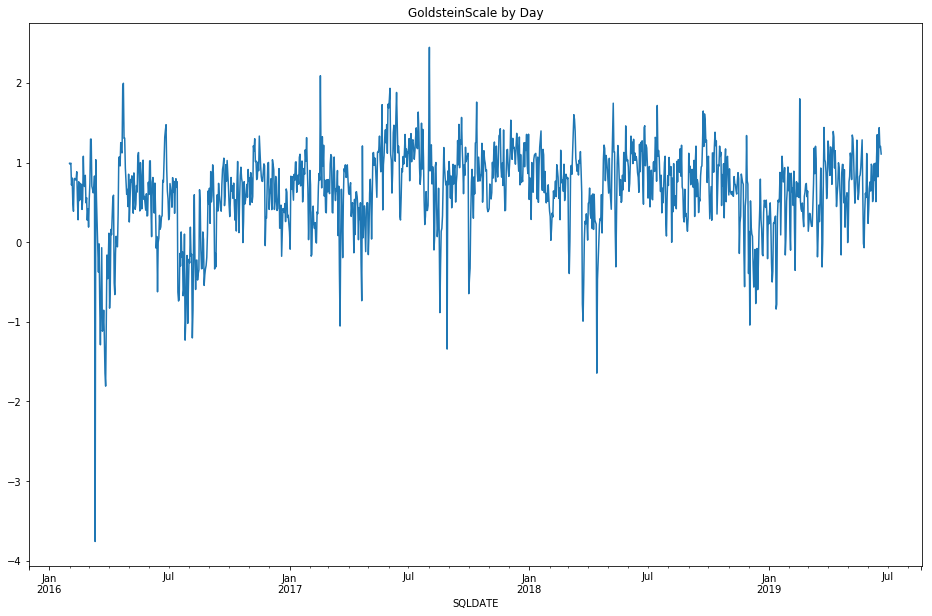

In [51]:
france_events.groupby("SQLDATE")["GoldsteinScale"].mean().plot(figsize=(16,10), title='GoldsteinScale by Day')

In [52]:
france_events.groupby("SQLDATE")["GoldsteinScale"].mean().sort_values(ascending = True)[:10]

SQLDATE
2016-03-11   -3.760000
2016-03-27   -1.808634
2016-03-26   -1.647622
2018-04-14   -1.645581
2017-08-29   -1.343137
2016-03-19   -1.289583
2016-07-26   -1.231033
2016-08-06   -1.203375
2016-03-25   -1.192055
2016-03-22   -1.118721
Name: GoldsteinScale, dtype: float64

### What was occurring on March 11, 2016?

In [53]:
france_events.loc[france_events['SQLDATE'] == '2016-03-11'].sort_values('GoldsteinScale', ascending=True)

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,DOMAINNAME
813826,2016-03-11,FRANCE,BELGIUM,http://fait-religieux.com/2016/04/10/paris-attacks-suspect-chose-not-to-blow-himself-up-says-his.html,201603,19,-10.0,3,-10.669890,FR,48.8667,2.33333,fait-religieux.com
1920903,2016-03-11,BARACK OBAMA,THE US,http://www.france24.com/en/20170311-us-military-faces-burgeoning-nude-picture-sharing-scandal,201603,19,-10.0,10,-3.025210,FR,46.0000,2.00000,www.france24.com
562902,2016-03-11,REUTERS,BRUSSELS,http://www.themalaymailonline.com/world/article/man-in-hat-abrini-charged-over-brussels-attack-says-prosecutor,201603,19,-10.0,3,-16.926999,FR,48.8667,2.33333,www.themalaymailonline.com
487696,2016-03-11,BRUSSELS,FRANCE,http://www.bostonherald.com/news/international/2016/04/brussels_attackers_first_plan_was_to_hit_france_again_prosecutors_say,201603,19,-10.0,1,-13.421053,FR,48.8667,2.33333,www.bostonherald.com
1120537,2016-03-11,NaN,BRUSSELS,http://www.euronews.com/2016/04/09/brussels-have-they-found-the-man-in-the-hat/,201603,19,-10.0,21,-7.177078,FR,48.8667,2.33333,www.euronews.com
1124616,2016-03-11,ALGERIA,BRUSSELS,http://www.amren.com/news/2016/03/pictured-isis-fugitive-behind-paris-massacre-fleeing-his-brussels-hideout-and-trying-to-run-past-phalanx-of-armed-police/,201603,19,-10.0,2,-6.109482,FR,48.8667,2.33333,www.amren.com
1125998,2016-03-11,FIGHTER,NaN,http://www.expatica.com/be/news/Paris-attacks-suspect-Abdeslam-captured-in-Brussels_615096.html,201603,19,-10.0,10,-9.570442,FR,48.8667,2.33333,www.expatica.com
1162282,2016-03-11,BRUSSELS,FRANCE,http://focus-fen.net/./news/2016/04/10/403221/man-in-hat-abrini-charged-over-brussels-attack-prosecutor.html,201603,19,-10.0,5,-19.660377,FR,48.8667,2.33333,focus-fen.net
1748609,2016-03-11,FIGHTER,NaN,http://www.channelnewsasia.com/news/world/paris-attacks-suspect/2616748.html,201603,19,-10.0,42,-9.906576,FR,48.8667,2.33333,www.channelnewsasia.com
1107928,2016-03-11,BELGIUM,TERRORIST,http://focus-fen.net/./news/2016/04/10/403221/man-in-hat-abrini-charged-over-brussels-attack-prosecutor.html,201603,19,-10.0,4,-20.005579,FR,48.8667,2.33333,focus-fen.net


#### It looks like the negative sentiment came from an attempt terrorist attack being foiled, although a large amount of `SOURCEURL` values are dead now.

### Mapping Events

### Let's truncate the `france_subset` to just the lat/long coordinates for now to get a visual of the events.

In [54]:
france_mapping = france_subset[['SQLDATE', 'ActionGeo_Lat', 'ActionGeo_Long', 'GLOBALEVENTID' ,'GoldsteinScale', 'AvgTone',]]

In [55]:
france_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103885 entries, 0 to 3103884
Data columns (total 6 columns):
SQLDATE           int64
ActionGeo_Lat     float64
ActionGeo_Long    float64
GLOBALEVENTID     int64
GoldsteinScale    float64
AvgTone           float64
dtypes: float64(4), int64(2)
memory usage: 142.1 MB


### Truncating the dataset to see if the kepler library works.

In [56]:
france_mapping = france_mapping.sample(n=5000, random_state=1)

In [57]:
# Load an empty map
from keplergl import KeplerGl

In [58]:
france_map = KeplerGl(height=500)

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


In [59]:
france_map.add_data(data=france_mapping, name='france_mapping')

### A hexbin of a sample of the values. Darker values symbolize larger amounts of articles in that area, based on lat/long coordinates.

In [60]:
france_map

KeplerGl(data={'france_mapping': {'index': [2130769, 1242414, 2550644, 2984274, 1304530, 1034400, 207032, 2012…

### Scatterplot of Number of Mentions against Goldstein Scale

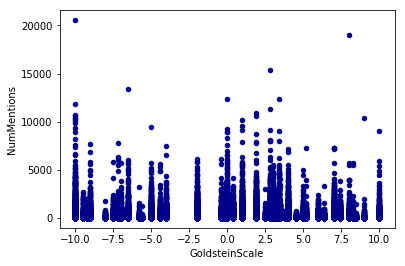

In [61]:
import matplotlib.pyplot as plt
mentions_v_goldstein = france_events.plot.scatter(x='GoldsteinScale', y='NumMentions',c='DarkBlue')
mentions_v_goldstein

#### Almost no correlation between these two columns.

In [62]:
france_events[['NumMentions', 'GoldsteinScale']].corr()

,NumMentions,GoldsteinScale
NumMentions,1.000000,-0.015239
GoldsteinScale,-0.015239,1.000000


### A correlation of all numerical values within the france_subset

In [63]:
france_numeric = france_subset[['SQLDATE','GLOBALEVENTID' , 'MonthYear', 'Year', 'IsRootEvent','EventRootCode', 'EventBaseCode', 'EventCode', 'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'QuadClass', 'AvgTone', 'ActionGeo_CountryCode', 'ActionGeo_Lat', 'ActionGeo_Long']]

In [64]:
france_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103885 entries, 0 to 3103884
Data columns (total 17 columns):
SQLDATE                  int64
GLOBALEVENTID            int64
MonthYear                int64
Year                     int64
IsRootEvent              int64
EventRootCode            int64
EventBaseCode            int64
EventCode                int64
GoldsteinScale           float64
NumMentions              int64
NumSources               int64
NumArticles              int64
QuadClass                int64
AvgTone                  float64
ActionGeo_CountryCode    object
ActionGeo_Lat            float64
ActionGeo_Long           float64
dtypes: float64(4), int64(12), object(1)
memory usage: 402.6+ MB


In [65]:
france_numeric.head()

,SQLDATE,GLOBALEVENTID,MonthYear,Year,IsRootEvent,EventRootCode,EventBaseCode,EventCode,GoldsteinScale,NumMentions,NumSources,NumArticles,QuadClass,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
0,20160324,523961397,201603,2016,0,1,10,10,0.0,84,10,84,1,-2.747776,FR,46.0000,2.00000
1,20160316,521622559,201603,2016,1,1,14,14,0.0,2,1,2,1,-0.643087,FR,46.0000,2.00000
2,20160229,516418595,201602,2016,1,4,42,42,1.9,8,2,8,1,0.675454,FR,46.0000,2.00000
3,20160321,522928257,201603,2016,0,12,120,120,-4.0,10,2,10,3,-5.533493,FR,46.0000,2.00000
4,20160510,538837301,201605,2016,1,4,42,42,1.9,2,1,2,1,0.000000,FR,43.5599,7.13672


In [66]:
france_numeric['GoldsteinScale'] = france_numeric['GoldsteinScale'].fillna(value= -5)

In [67]:
missing_zero_values_table(france_numeric)

Your selected dataframe has 17 columns and 3103885 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


,SQLDATE,GLOBALEVENTID,MonthYear,Year,IsRootEvent,EventRootCode,EventBaseCode,EventCode,GoldsteinScale,NumMentions,NumSources,NumArticles,QuadClass,AvgTone,ActionGeo_Lat,ActionGeo_Long
SQLDATE,1.000000,0.999266,1.000000,0.999991,-0.218901,-0.234639,-0.236228,-0.265603,0.161798,-0.271887,-0.260579,-0.272494,-0.226720,0.074803,-0.174592,-0.183048
GLOBALEVENTID,0.999266,1.000000,0.999265,0.999097,-0.219506,-0.239394,-0.240981,-0.269022,0.166650,-0.272424,-0.261058,-0.273030,-0.231514,0.080162,-0.175434,-0.180652
MonthYear,1.000000,0.999265,1.000000,0.999991,-0.218901,-0.234644,-0.236233,-0.265605,0.161803,-0.271886,-0.260578,-0.272493,-0.226725,0.074807,-0.174582,-0.183058
Year,0.999991,0.999097,0.999991,1.000000,-0.218834,-0.234205,-0.235794,-0.265253,0.161374,-0.271881,-0.260585,-0.272488,-0.226285,0.074406,-0.174583,-0.183236
IsRootEvent,-0.218901,-0.219506,-0.218901,-0.218834,1.000000,-0.103900,-0.104410,-0.128586,0.071198,-0.029608,-0.034505,-0.029511,-0.104390,0.137865,-0.133322,-0.079965
EventRootCode,-0.234639,-0.239394,-0.234644,-0.234205,-0.103900,1.000000,0.999988,0.740141,-0.977123,-0.121348,-0.124318,-0.121619,0.999433,-0.698327,-0.044720,-0.027456
EventBaseCode,-0.236228,-0.240981,-0.236233,-0.235794,-0.104410,0.999988,1.000000,0.742243,-0.976181,-0.122795,-0.125789,-0.123064,0.999349,-0.698531,-0.044688,-0.028317
EventCode,-0.265603,-0.269022,-0.265605,-0.265253,-0.128586,0.740141,0.742243,1.000000,-0.679458,-0.170508,-0.172065,-0.170570,0.741041,-0.575420,-0.049329,-0.054479
GoldsteinScale,0.161798,0.166650,0.161803,0.161374,0.071198,-0.977123,-0.976181,-0.679458,1.000000,0.046832,0.047929,0.047095,-0.980185,0.695872,0.013556,-0.004238
NumMentions,-0.271887,-0.272424,-0.271886,-0.271881,-0.029608,-0.121348,-0.122795,-0.170508,0.046832,1.000000,0.965933,0.999961,-0.113869,-0.141654,-0.028785,-0.091415


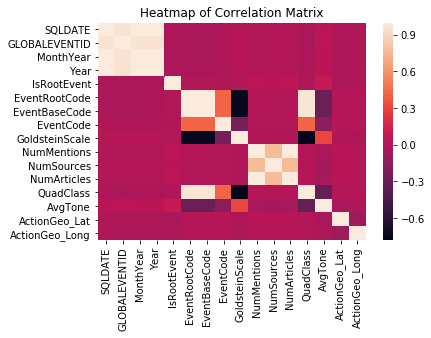

In [68]:
import seaborn as sns
france_heatmap = france_numeric.corr()
france_heatmap = (france_heatmap)
sns.heatmap(france_heatmap, 
            xticklabels= france_heatmap.columns.values,
            yticklabels= france_heatmap.columns.values)
plt.title('Heatmap of Correlation Matrix')
france_heatmap.corr()

### Part two summary:
 - Counted and plotted events by `EventRootCode`.
 - Counted and plotted events by `GoldsteinScale`.
 - Counted and found the number of domain names in dataset.
 - Charted number of events and `GoldsteinScale` mean per day.
 - Built a hexbin map through kepler.gl to spatially preview data.
 - Built a scatterplot of `GoldsteinScale` versus `NumMentions` values.
 - Built a heatmap of numerical values to preview correlations.